# Decision tree classifier model to predict whether the customer will purchase the service or not

In [1]:
# Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading the dataset

In [4]:
df=pd.read_csv('C:/Users/Hp/OneDrive/Documents/mru/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
# importing decision tree algorithm

In [6]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [7]:
# selecting relevant features from the dataset

In [8]:
x=df.iloc[:,0:9].values
x

array([[59, 'admin.', 'married', ..., 'yes', 'no', 'unknown'],
       [56, 'admin.', 'married', ..., 'no', 'no', 'unknown'],
       [41, 'technician', 'married', ..., 'yes', 'no', 'unknown'],
       ...,
       [32, 'technician', 'single', ..., 'no', 'no', 'cellular'],
       [43, 'technician', 'married', ..., 'no', 'yes', 'cellular'],
       [34, 'technician', 'married', ..., 'no', 'no', 'cellular']],
      dtype=object)

In [9]:
y=df['deposit'].values
y

array(['yes', 'yes', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [10]:
print(np.unique(df['job']))


['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [11]:
print(np.unique(df['marital']))

['divorced' 'married' 'single']


In [12]:
print(np.unique(df['education']))

['primary' 'secondary' 'tertiary' 'unknown']


In [13]:
# Encoding the categorical values into numerical values

In [14]:
# Columns to encode
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['job', 'marital', 'education']

# Initialize LabelEncoders for each column
label_encoders = {col: LabelEncoder() for col in columns_to_encode}

# Apply LabelEncoders to each column
for col in columns_to_encode:
    df[col] = label_encoders[col].fit_transform(df[col])

print(df)


       age  job  marital  education default  balance housing loan   contact  \
0       59    0        1          1      no     2343     yes   no   unknown   
1       56    0        1          1      no       45      no   no   unknown   
2       41    9        1          1      no     1270     yes   no   unknown   
3       55    7        1          1      no     2476     yes   no   unknown   
4       54    0        1          2      no      184      no   no   unknown   
...    ...  ...      ...        ...     ...      ...     ...  ...       ...   
11157   33    1        2          0      no        1     yes   no  cellular   
11158   39    7        1          1      no      733      no   no   unknown   
11159   32    9        2          1      no       29      no   no  cellular   
11160   43    9        1          1      no        0      no  yes  cellular   
11161   34    9        1          1      no        0      no   no  cellular   

       day month  duration  campaign  pdays  previo

In [15]:
print(np.unique(df['default']))

['no' 'yes']


In [16]:
print(np.unique(df['housing']))	

['no' 'yes']


In [17]:
print(np.unique(df['loan']))

['no' 'yes']


In [18]:
print(np.unique(df['contact']))

['cellular' 'telephone' 'unknown']


In [19]:
print(np.unique(df['deposit']))

['no' 'yes']


In [20]:
# Columns to encode
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['default', 'housing', 'loan', 'deposit', 'contact']

# Initialize LabelEncoders for each column
label_encoders = {col: LabelEncoder() for col in columns_to_encode}

# Apply LabelEncoders to each column
for col in columns_to_encode:
    df[col] = label_encoders[col].fit_transform(df[col])

print(df)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       59    0        1          1        0     2343        1     0        2   
1       56    0        1          1        0       45        0     0        2   
2       41    9        1          1        0     1270        1     0        2   
3       55    7        1          1        0     2476        1     0        2   
4       54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33    1        2          0        0        1        1     0        0   
11158   39    7        1          1        0      733        0     0        2   
11159   32    9        2          1        0       29        0     0        0   
11160   43    9        1          1        0        0        0     1        0   
11161   34    9        1          1        0        0        0     0        0   

       day month  duration 

In [21]:
# Encoded data 
# Cleaned data

In [22]:
data= df
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,may,1042,1,-1,0,unknown,1
1,56,0,1,1,0,45,0,0,2,5,may,1467,1,-1,0,unknown,1
2,41,9,1,1,0,1270,1,0,2,5,may,1389,1,-1,0,unknown,1
3,55,7,1,1,0,2476,1,0,2,5,may,579,1,-1,0,unknown,1
4,54,0,1,2,0,184,0,0,2,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,apr,257,1,-1,0,unknown,0
11158,39,7,1,1,0,733,0,0,2,16,jun,83,4,-1,0,unknown,0
11159,32,9,2,1,0,29,0,0,0,19,aug,156,2,-1,0,unknown,0
11160,43,9,1,1,0,0,0,1,0,8,may,9,2,172,5,failure,0


In [23]:
x=data.iloc[:,0:9].values
x

array([[59,  0,  1, ...,  1,  0,  2],
       [56,  0,  1, ...,  0,  0,  2],
       [41,  9,  1, ...,  1,  0,  2],
       ...,
       [32,  9,  2, ...,  0,  0,  0],
       [43,  9,  1, ...,  0,  1,  0],
       [34,  9,  1, ...,  0,  0,  0]], dtype=int64)

In [24]:
y=data['deposit'].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
# Model building

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [27]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
# Model fitting

In [29]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
# predictions

In [31]:
y_pred=dt.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [32]:
print(dt.predict([[24,1,3,4,5,2,5,7,8]]))

[0]


In [33]:
# Model evaluation

In [34]:
from sklearn import metrics
test_acc=metrics.accuracy_score(y_test,y_pred)
test_acc

0.6753851666069509

In [35]:
# confusion matrix

In [36]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[1048,  402],
       [ 504,  837]], dtype=int64)

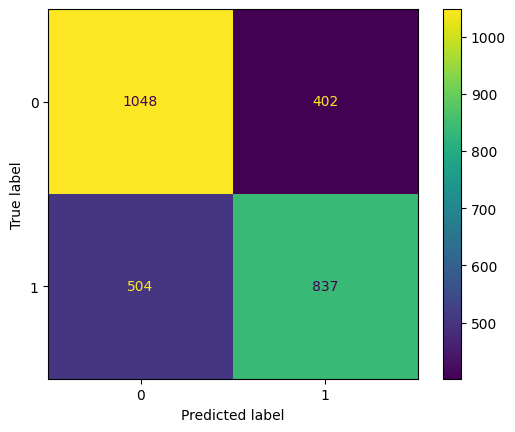

In [37]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
cm_display.plot()
plt.show()